In [ ]:
# !pip install PyMC==5.7.2 

In [ ]:
# !pip install ArviZ==0.15.1

In [ ]:
# !pip install Scipy==1.10.1

In [ ]:
# !pip install seaborn

## 共通処理

In [1]:
# 必要なパッケージをインポート
# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)


## ch1

Text(0.5, 1.0, 'くじ引きの確率の可視化')

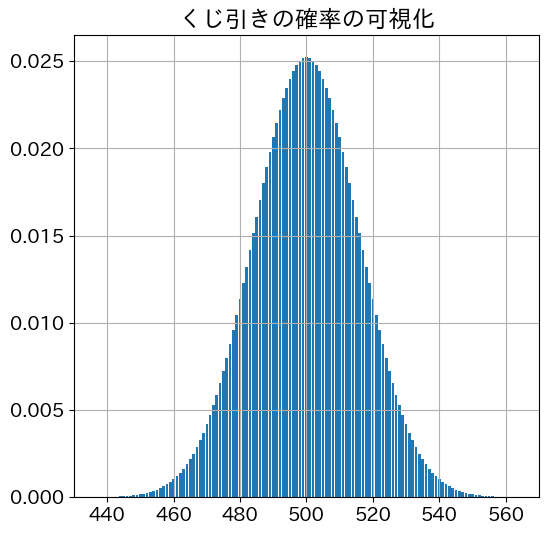

In [4]:
from scipy.special import comb

n = 1000
x = range(n + 1)
y = [comb(n, i) / 2 ** n for i in x]
plt.bar(x, y)
plt.xlim((430, 570))
plt.title("くじ引きの確率の可視化")

In [5]:
import pymc as pm
import arviz as az

Sampling: [x]


(1, 500)
[4 4 4 2 4 1 5 3 1 2]
0     13
1     79
2    152
3    159
4     84
5     13
Name: count, dtype: int64


,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


Text(0.5, 1.0, 'サンプル値の可視化結果')

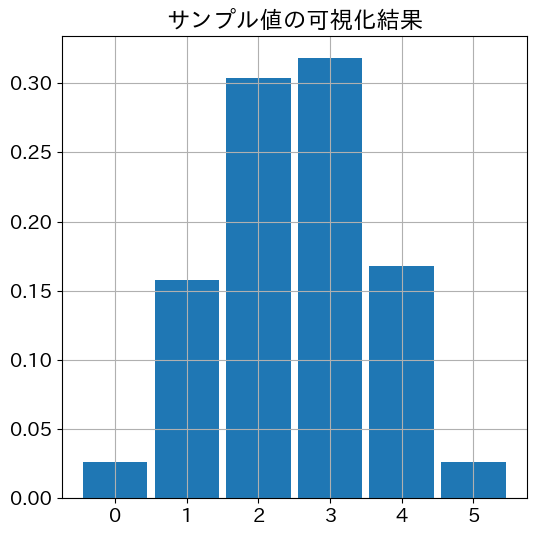

In [31]:
# 確率モデルの定義
model = pm.Model() # 確率モデルコンテキスト用インスタンス
with model:
    x = pm.Binomial("x", p = 0.5, n = 5)

# サンプリング
with model:
    prior_samples = pm.sample_prior_predictive(random_seed = 42) # prior_samplesは複雑な階層構造を持つ

# 結果分析、データ抽出(by Numpy)
x_samples = prior_samples["prior"]["x"].values
print(x_samples.shape)
print(x_samples[0][0:10])
value_cnt = pd.DataFrame(x_samples.reshape(-1)).value_counts().sort_index()
print(value_cnt)

# 結果分析、データ抽出(by ArviZ)
display(az.summary(prior_samples, kind = "stats"))
ax = az.plot_dist(x_samples)
ax.set_title("サンプル値の可視化結果")


In [36]:
# 上記のまとめ（確率分布とPyMCプログラミングの対応）
model = pm.Model() 
with model:
    x = pm.Binomial("x", p=0.5, n=5) 
        # pm.Binomial(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples = pm.sample_prior_predictive(random_seed = 42)
        # サンプル値に対応

Sampling: [x]


## ch2

### Bernoulli分布

Sampling: [x]


(1, 1000)
[[0 0 0 1 0 1 0 0 1 1]]
0    300
1    700
Name: count, dtype: int64


,mean,sd,hdi_3%,hdi_97%
x,0.700,0.458,0.000,1.000


Text(0.5, 1.0, 'ベルヌーイ分布 p=0.7')

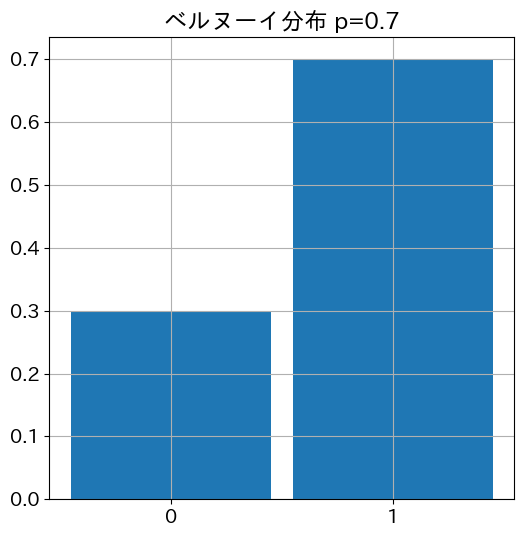

In [56]:
# 当たる確率(確率モデルのパラメータを指定)
p = 0.7

model1 = pm.Model() # 確率モデルコンテキスト用インスタンス
with model1:
    x = pm.Bernoulli("x", p=p) 
        # pm.Bernoulli(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples1 = pm.sample_prior_predictive(samples=1000, random_seed = 42)
        # サンプリング: サンプル値に対応

# サンプル値を取得、分析
x_samples1 = prior_samples1["prior"]["x"].values
print(x_samples1.shape)
print(x_samples1[:, 0:10])
value_cnt1 = pd.DataFrame(x_samples1.reshape(-1)).value_counts().sort_index()
print(value_cnt1)

summary1 = az.summary(prior_samples1, kind = "stats")
display(summary1)
ax = az.plot_dist(x_samples1)
ax.set_title(f"ベルヌーイ分布 p={p}")


### Binomial分布

Sampling: [x]


(1, 1000)
[[30 30 29 23 31 22 34 27 21 24]]
16      2
17     10
18     13
19     24
20     52
21     50
22     79
23     89
24    109
25    127
26    110
27     85
28     95
29     53
30     44
31     25
32     19
33      7
34      5
35      1
36      1
Name: count, dtype: int64


,mean,sd,hdi_3%,hdi_97%
x,25.085,3.427,19.000,31.000


Text(0.5, 1.0, 'ベルヌーイ分布 p=0.5 n=50')

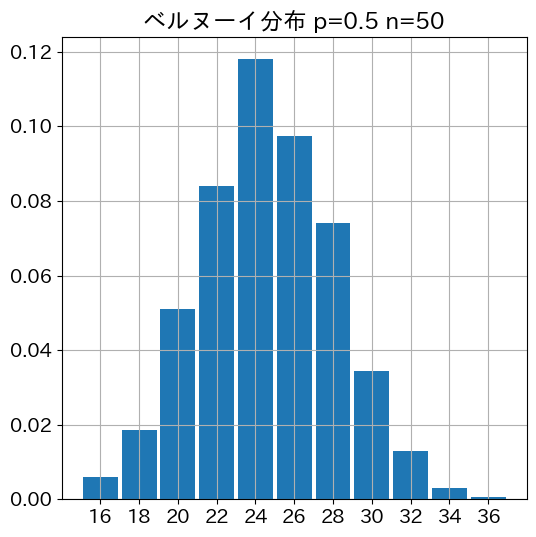

In [55]:
# 当たる確率がp、試行回数がn(確率モデルのパラメータを指定)
p = 0.5
n = 50

model2 = pm.Model() # 確率モデルコンテキスト用インスタンス
with model2:
    x = pm.Binomial("x", p=p, n=n) 
        # pm.Bernoulli(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples2 = pm.sample_prior_predictive(samples=1000, random_seed = 42)
        # サンプリング: サンプル値に対応

# サンプル値を取得、分析
x_samples2 = prior_samples2["prior"]["x"].values
print(x_samples2.shape)
print(x_samples2[:, 0:10])
value_cnt2 = pd.DataFrame(x_samples2.reshape(-1)).value_counts().sort_index()
print(value_cnt2)

summary2 = az.summary(prior_samples2, kind = "stats")
display(summary2)
ax = az.plot_dist(x_samples2)
ax.set_title(f"ベルヌーイ分布 p={p} n={n}")

### Normal分布

Sampling: [x]


(1, 1000)
[[ 3.837  4.211  3.058  0.832  5.928  3.581  0.338  2.931  3.561  3.215
  -0.842  6.157  5.012  3.902  1.813  3.188  6.704  2.488  2.434  3.832]]


,mean,sd,hdi_3%,hdi_97%
x,2.978,1.959,-0.489,6.801


Text(0.5, 1.0, '正規分布 mu=3.0 sigma=2.0')

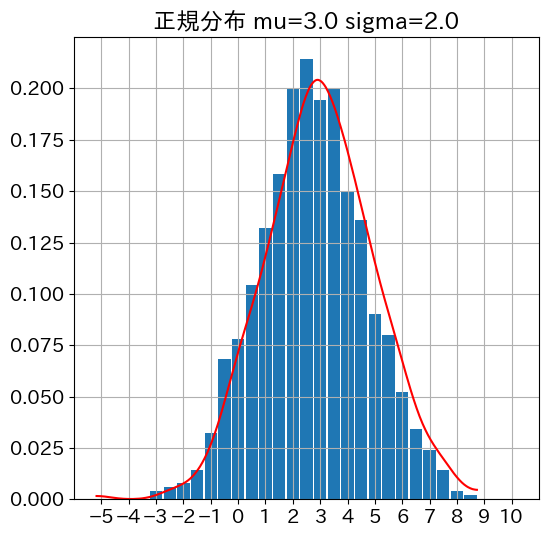

In [68]:
# 平均がmu、標準偏差がsigma(確率モデルのパラメータを指定)
mu = 3.0
sigma = 2.0

model3 = pm.Model() # 確率モデルコンテキスト用インスタンス
with model3:
    x = pm.Normal("x", mu=mu, sigma=sigma) 
        # pm.Normal(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples3 = pm.sample_prior_predictive(samples=1000, random_seed = 42)
        # サンプリング: サンプル値に対応

# サンプル値を取得、分析
x_samples3 = prior_samples3["prior"]["x"].values
print(x_samples3.shape)
print(x_samples3[:, 0:20])
# value_cnt3 = pd.DataFrame(x_samples3.reshape(-1)).value_counts().sort_index()
# print(value_cnt3)

summary3 = az.summary(prior_samples3, kind = "stats")
display(summary3)
bins = np.arange(-5, 11, 0.5)
ax = az.plot_dist(x_samples3, kind = "hist", hist_kwargs = {"bins":bins})
plt.xticks(np.arange(-5, 11, 1))

ax = az.plot_dist(x_samples3, color="r")
ax.set_title(f"正規分布 mu={mu} sigma={sigma}")

### Uniform分布

Sampling: [x]


(1, 1000)
[[0.667 0.664 0.651 0.424 0.682 0.370 0.699 0.601 0.360 0.453 0.532 0.370
  0.400 0.671 0.480 0.332 0.672 0.306 0.598 0.503]]


,mean,sd,hdi_3%,hdi_97%
x,0.502,0.114,0.323,0.694


Text(0.5, 1.0, '一様分布 lower=0.3 upper=0.7')

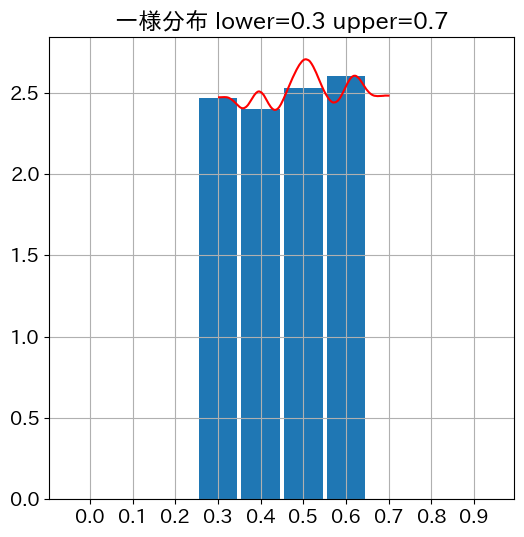

In [73]:
# 確率変数の下限値をlower、上限値をupper(確率モデルのパラメータを指定)
lower = 0.3
upper = 0.7

model4 = pm.Model() # 確率モデルコンテキスト用インスタンス
with model4:
    x = pm.Uniform("x", lower=lower, upper=upper) 
        # pm.Normal(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples4 = pm.sample_prior_predictive(samples=1000, random_seed = 42)
        # サンプリング: サンプル値に対応

# サンプル値を取得、分析
x_samples4 = prior_samples4["prior"]["x"].values
print(x_samples4.shape)
print(x_samples4[:, 0:20])
# value_cnt3 = pd.DataFrame(x_samples3.reshape(-1)).value_counts().sort_index()
# print(value_cnt3)

summary4 = az.summary(prior_samples4, kind = "stats")
display(summary4)
bins = np.arange(0.0, 1.1, 0.1)
ax = az.plot_dist(x_samples4, kind = "hist", hist_kwargs = {"bins":bins})
# plt.xticks(np.arange(0.0, 1.1, 0.1))

ax = az.plot_dist(x_samples4, color="r")
ax.set_title(f"一様分布 lower={lower} upper={upper}")

# 幅を狭めると高さが高くなる。面積が1のため。

### Beta分布

Sampling: [p]


(1, 500)
[[0.423 0.540 0.509 0.482 0.510 0.310 0.363 0.403 0.420 0.432 0.535 0.324
  0.474 0.396 0.381 0.379 0.421 0.381 0.398 0.491]]


,mean,sd,hdi_3%,hdi_97%
p,0.403,0.068,0.281,0.534


Text(0.5, 1.0, 'Beta分布 alpha=21 beta=31')

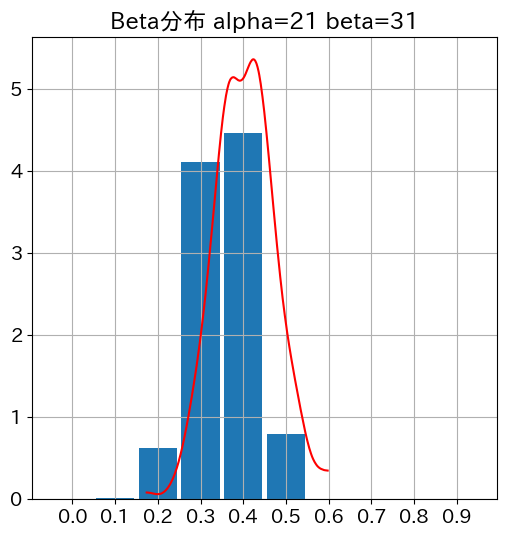

In [78]:
# 当たる回数がt, 外れの回数がf(確率モデルのパラメータを指定)
t = 20
f = 30
alpha = t + 1
beta = f +1

model5 = pm.Model()
with model5:
    x = pm.Beta("p", alpha = alpha, beta = beta)
        # pm.Beta(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples5 = pm.sample_prior_predictive(samples = 500, random_seed = 42)
        # サンプリング: サンプル値に対応

# サンプル値を取得、分析
x_samples5 = prior_samples5["prior"]["p"].values
print(x_samples5.shape)
print(x_samples5[:, 0:20])
# value_cnt3 = pd.DataFrame(x_samples3.reshape(-1)).value_counts().sort_index()
# print(value_cnt3)

summary5 = az.summary(prior_samples5, kind = "stats")
display(summary5)
bins = np.arange(0.0, 1.1, 0.1)
ax = az.plot_dist(x_samples5, kind = "hist", hist_kwargs = {"bins":bins})
# plt.xticks(np.arange(0.0, 1.1, 0.1))

ax = az.plot_dist(x_samples5, color="r")
ax.set_title(f"Beta分布 alpha={alpha} beta={beta}")

# 試行回数が増えると、0.3~0.5の確度が高まっている

### HalfNormal分布

Sampling: [x]


(1, 1000)
[[0.418 0.606 0.029 1.084 1.464 0.291 1.331 0.035 0.280 0.107 1.921 1.579
  1.006 0.451 0.593 0.094 1.852 0.256 0.283 0.416]]


Text(0.5, 1.0, '半正規分布 sigma=1.0')

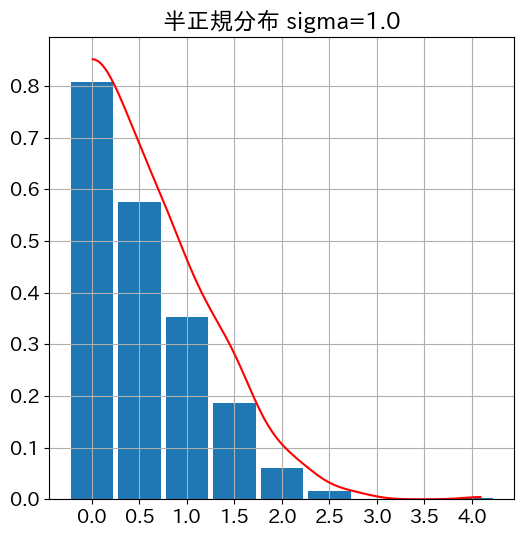

In [88]:
# 標準偏差がsigma(確率モデルのパラメータを指定)
sigma = 1.0

model6 = pm.Model()
with model6:
    x = pm.HalfNormal("x", sigma = sigma)
        # pm.Beta(): 分布関数を定義
        # パラメータの指定: 確率分布を定める
        # xが確率変数に対応
    prior_samples6 = pm.sample_prior_predictive(samples = 1000, random_seed = 42)
        # サンプリング: サンプル値に対応

# サンプル値を取得、分析
x_samples6 = prior_samples6["prior"]["x"].values
print(x_samples6.shape)
print(x_samples6[:, 0:20])

bins = np.arange(0.0, 5.0, 0.5)
ax = az.plot_dist(x_samples6, kind = "hist", hist_kwargs = {"bins":bins})

ax = az.plot_dist(x_samples6, color="r")
ax.set_title(f"半正規分布 sigma={sigma}")

## ch3